In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import sys
sys.path.append('../')

from src.algo.pg import PGAgent
from src.envs.pendulum import InvPendulumLinEnvPartialNorm

In [2]:
# rnn_path = '../data/pendulum_partial_norm_rnn_06-05-2022_13-28-32/2/'
# rnn_path = '../data/pendulum_partial_norm_rnn_07-05-2022_11-57-10/2/'
rnn_path = '../data/pendulum_partial_norm_rnn_proj_08-05-2022_12-35-21/2/'

prefs = ['best_', 'e000_', 'e100_', 'e200_', 'e300_', 'e400_', 'e500_']

agents = {
    px[:-1]: PGAgent.load(rnn_path + px)
    for px in prefs
}
agents

{'best': <src.algo.pg.PGAgent at 0x10ef1b6a0>,
 'e000': <src.algo.pg.PGAgent at 0x13a449b00>,
 'e100': <src.algo.pg.PGAgent at 0x13a449be0>,
 'e200': <src.algo.pg.PGAgent at 0x13a465fd0>,
 'e300': <src.algo.pg.PGAgent at 0x13a465470>,
 'e400': <src.algo.pg.PGAgent at 0x13a478a20>,
 'e500': <src.algo.pg.PGAgent at 0x13a478a58>}

In [3]:
env = InvPendulumLinEnvPartialNorm(
    factor=1e-1,
    # max_torque=10000,
)
env.max_torque = 10_000
env

/Users/hunterheidenreich/git/IQCRNN_PyTorch/venv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [17]:
def get_traj_plot(agent, n=9, horizon=100):
    xs = np.linspace(-1, 1, n)
    ys = np.linspace(-2, 2, n)

    plt.figure(dpi=300, figsize=(3.2, 4.8))
    plt.xlim(-1, 1)
    plt.ylim(-2, 2)

    for x in tqdm(xs):
        for y in ys:
            states = agent.sample_trajectory(env, False, init_state=[x, y], horizon=horizon)['state']
            # print(states.shape)

            if np.linalg.norm(states[-1]) > 0.7:
                c="tab:red"
                # print('RED', states[-1])
            else:
                c="tab:green"
                # continue

            plt.plot(states[:, 0], states[:, 1], color=c, linewidth=0.5)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

100%|██████████| 9/9 [00:10<00:00,  1.15s/it]


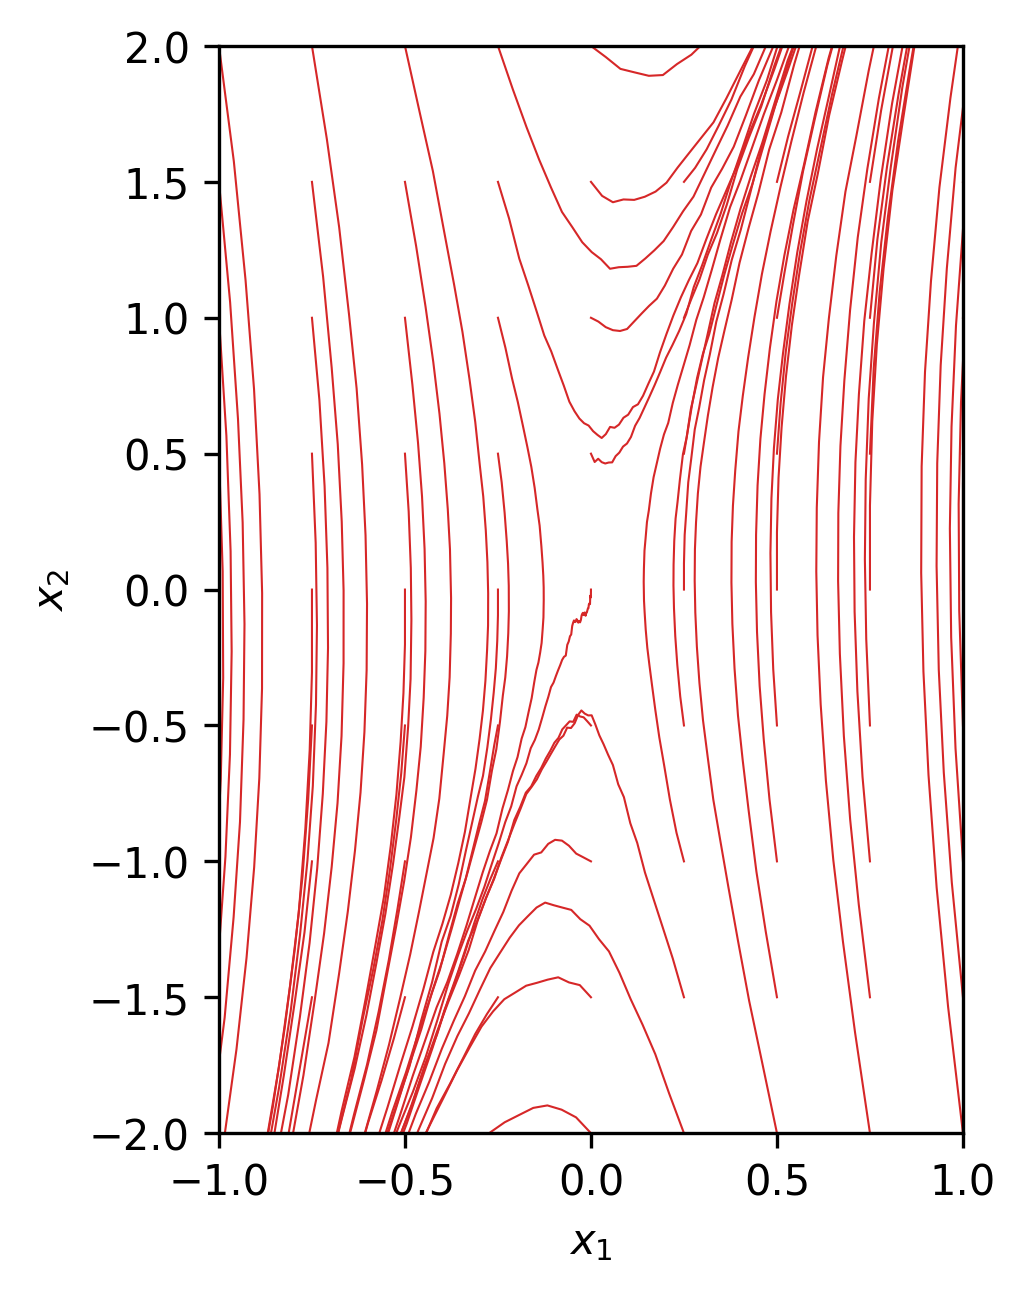

In [18]:
get_traj_plot(agents['e000'])

100%|██████████| 9/9 [00:10<00:00,  1.18s/it]


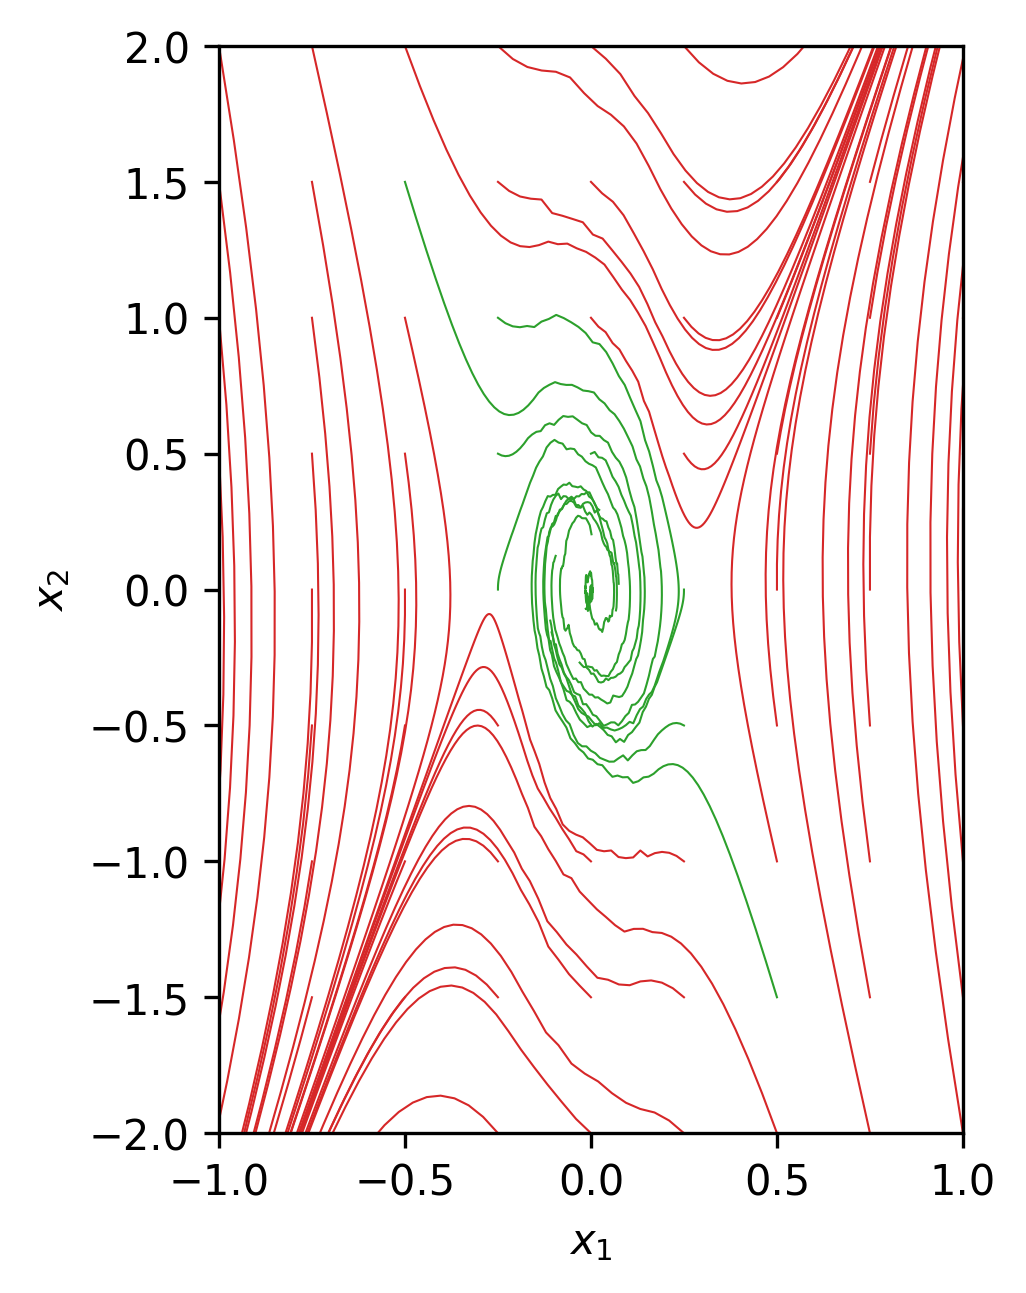

In [19]:
get_traj_plot(agents['e100'])

100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


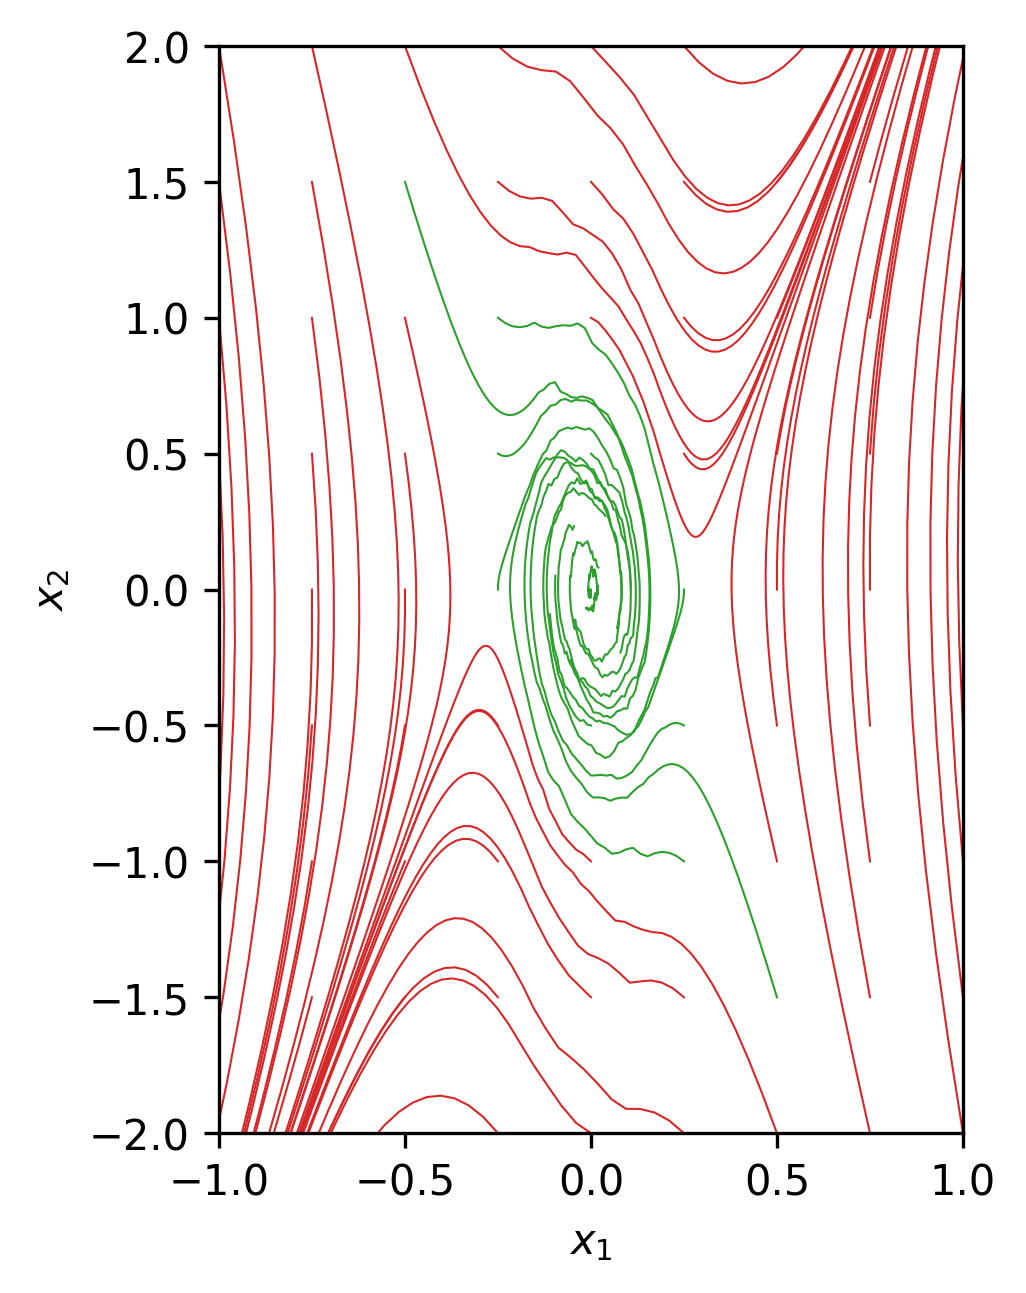

In [20]:
get_traj_plot(agents['e200'])

100%|██████████| 9/9 [00:11<00:00,  1.31s/it]


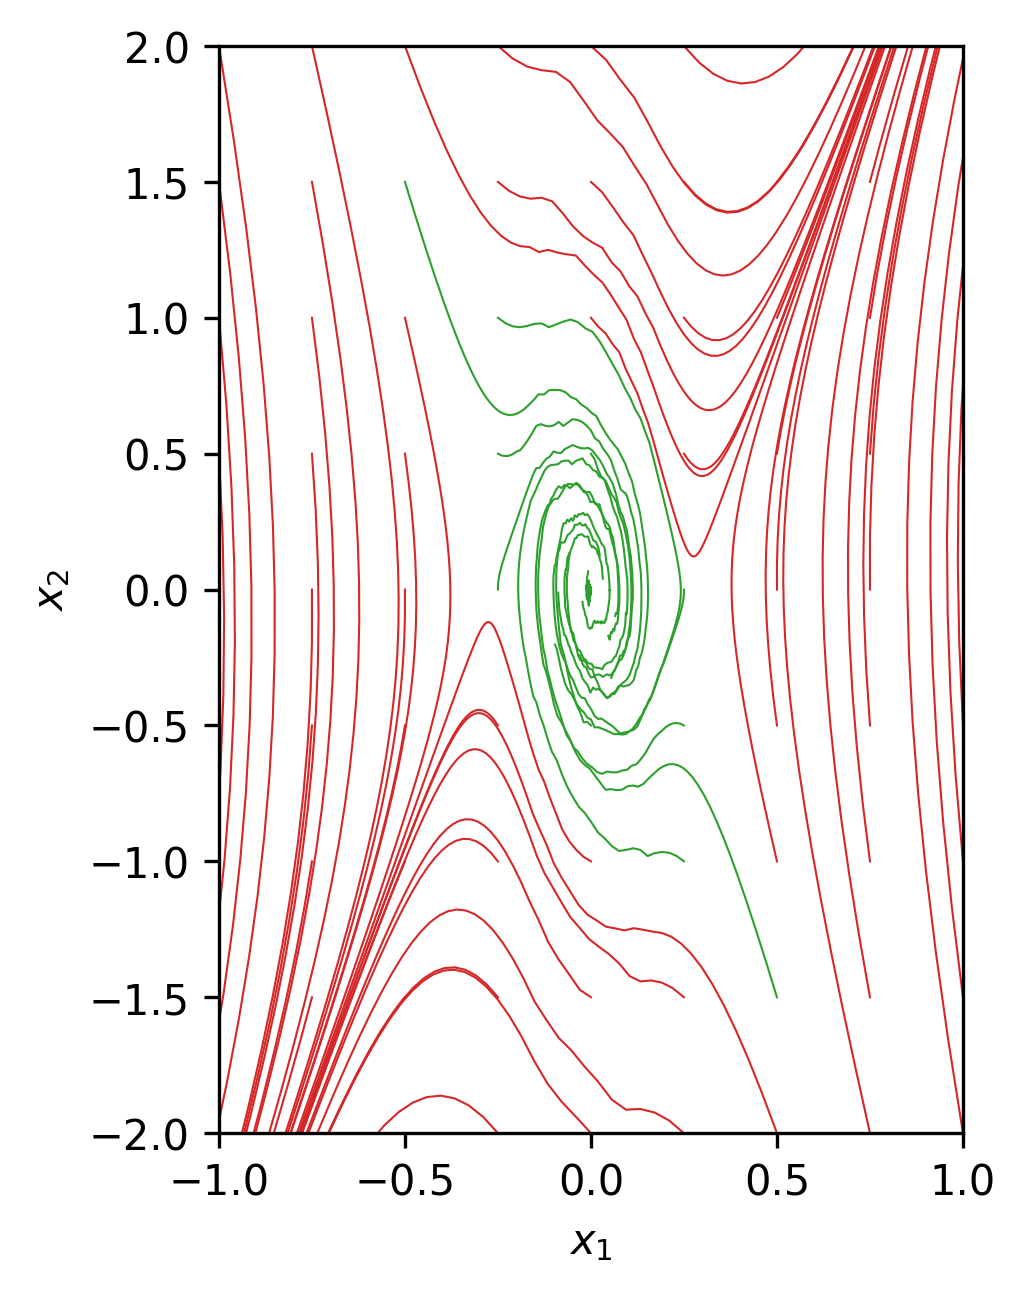

In [21]:
get_traj_plot(agents['e300'])

100%|██████████| 9/9 [00:15<00:00,  1.68s/it]


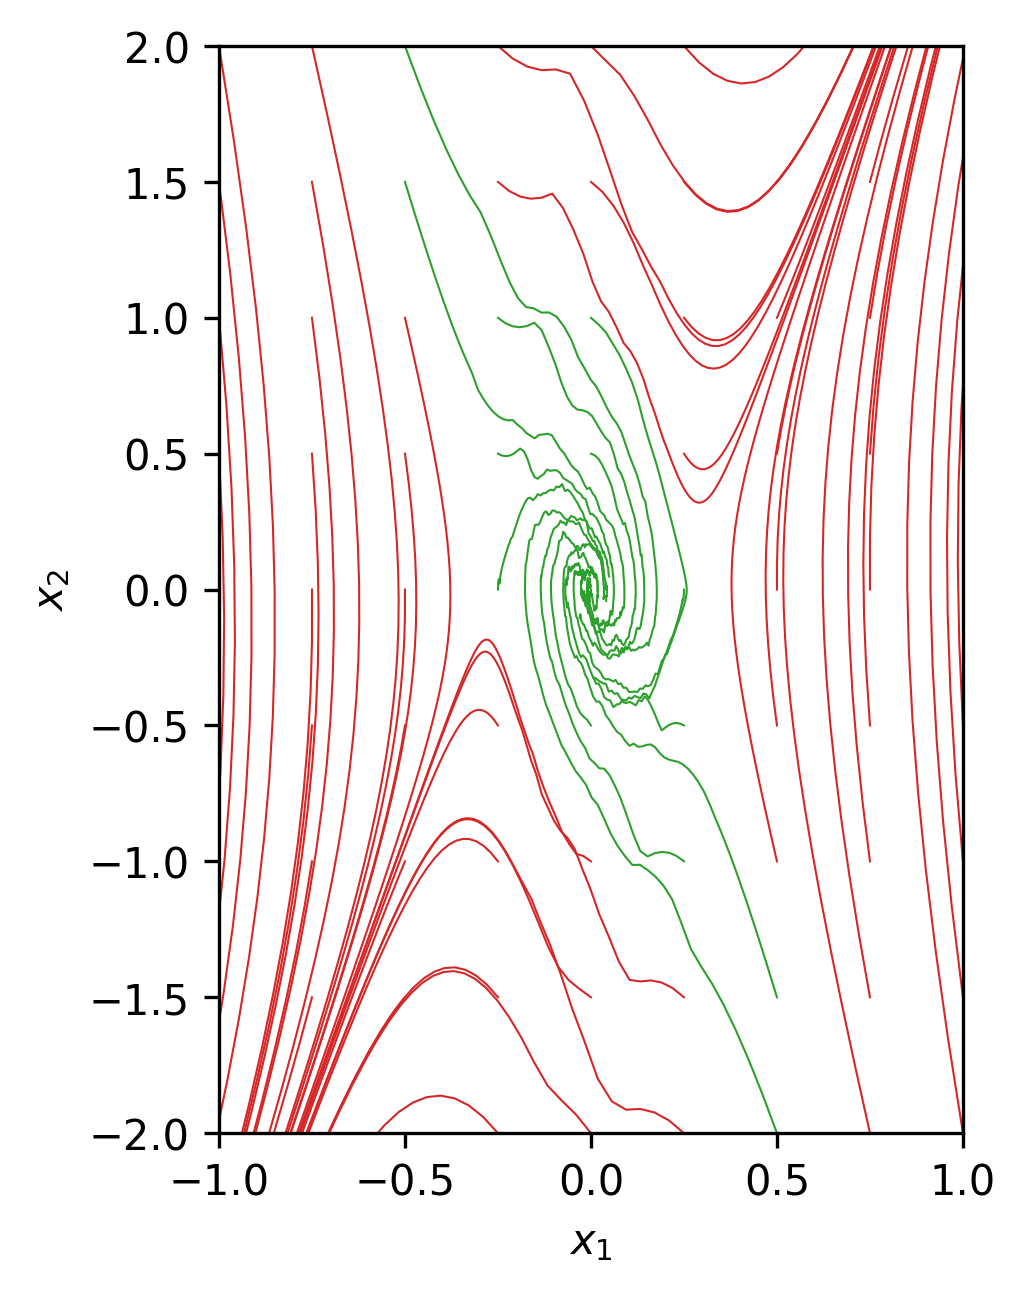

In [22]:
get_traj_plot(agents['e400'])

100%|██████████| 9/9 [00:10<00:00,  1.15s/it]


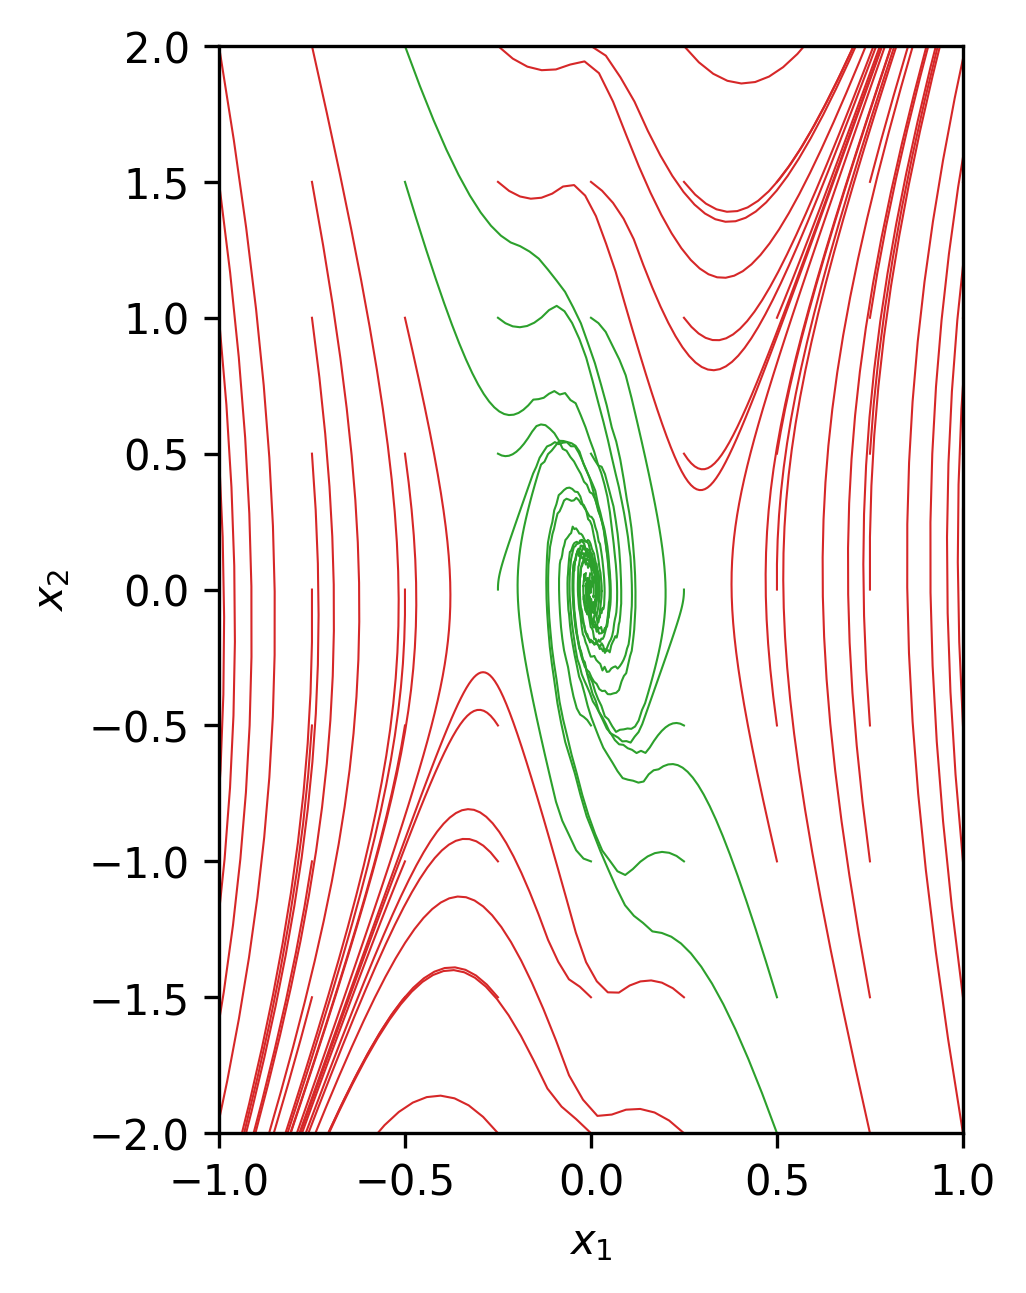

In [23]:
get_traj_plot(agents['e500'])

100%|██████████| 9/9 [00:16<00:00,  1.87s/it]


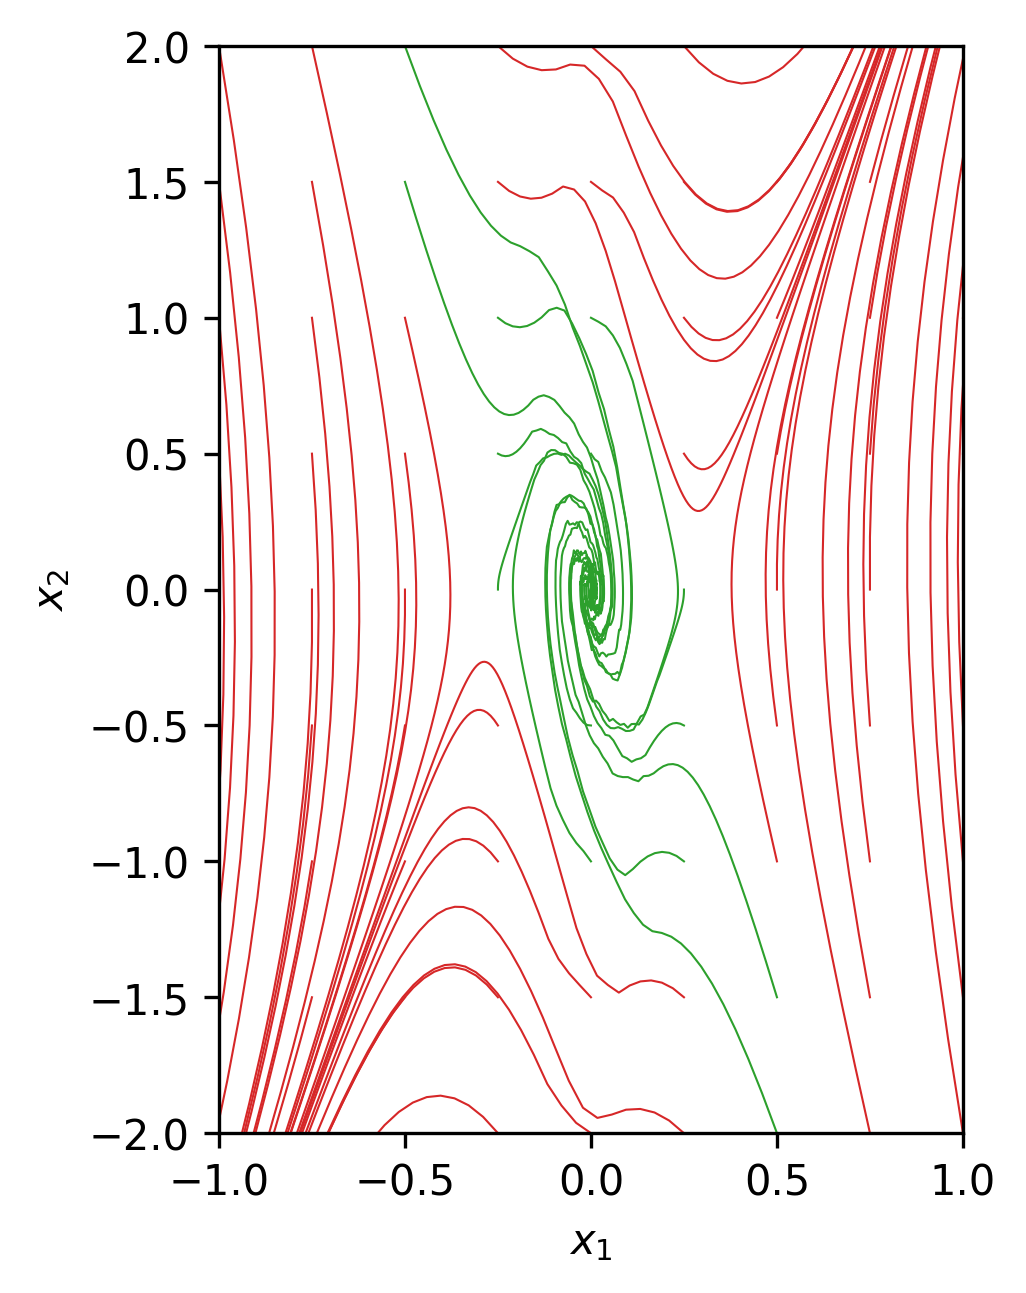

In [24]:
get_traj_plot(agents['best'])